   # Jupyter Notebook

Solve the 1st order Ordinary Differential Equations (ODEs:):

$\frac{dx}{dt}+x=1$

Solve the 2ndd order ODE:

$\frac{d^2y}{dt^2}+\frac{dy}{dt}+y=e^t&

In [10]:
from sympy import * # Import all functions from sympy library
t = symbols('t')
x = symbols('x' , cls = Function)
ODE1 = Eq(x(t).diff(t) , 1 - x(t))  # dx/dy=1-x
sol1 = dsolve(ODE1 , x(t))
print(sol1)

Eq(x(t), C1*exp(-t) + 1)


In [1]:
# Program_3a.ipynb: Animation of a Sine Curve.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# Set up figure.
fig, ax = plt.subplots()
plt.title('Animation of a Sine Wave')
plt.close()
# Set domain and range.
ax.set_xlim(( 0, 2 * np.pi))
ax.set_ylim((- 1.2, 1.2))
# Set line width.
line, = ax.plot([], [], lw=2)
# Initialization function: plot the background of each frame.
def init():
    line.set_data([], [])
    return (line,)
# Animation function. This is called sequentially.  
def animate(n):
    x = np.linspace(0, 2 * np.pi, 100)
    y = np.sin(0.05 * n * x)  # 0<n<100. n is equals to frames
    line.set_data(x, y)
    return (line,)
# Animate, interval sets the speed of animation.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=101, interval=100, blit=True)
# Note: below is the part which makes it work on Colab.
rc('animation', html='jshtml')
anim

In [ ]:
Animate the curve $y=\sin{\omega t}$

In [7]:
# Program_3a.ipynb: Animation of a Sine Curve.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# Set up figure.
fig, ax = plt.subplots()
plt.title('Animation of a Function') # Title
plt.close()
# Set domain and range.
ax.set_xlim(( 0, 100)) # set x-axis / Domain
ax.set_ylim((- 1.2, 1.2)) # set y axis / Range
# Set line width.
line, = ax.plot([], [], lw=2)
# Initialization function: plot the background of each frame.
def init():
    line.set_data([], [])
    return (line,)
# Animation function. This is called sequentially.  
def animate(n):
    x = np.linspace(0, 100, 1000) # Domain vector
    #y = np.sin(0.05 * n * x)  # 0<n<100. n is equals to frames
    y = np.exp(-0.01 * (n / 2) * x) * np.sin(x) #0<n<100  n=frames=100  A=100/2=50
    line.set_data(x, y)
    return (line,)
# Animate, interval sets the speed of animation.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=101, interval=100, blit=True)
# Note: below is the part which makes it work on Colab.
rc('animation', html='jshtml')
anim

# Biology

## Population of Blowfly

Logistic Map Equation: Simple iterative equation:

$x_{n+1}=\mu x (1-x)$

where $x_n$ is population on day n

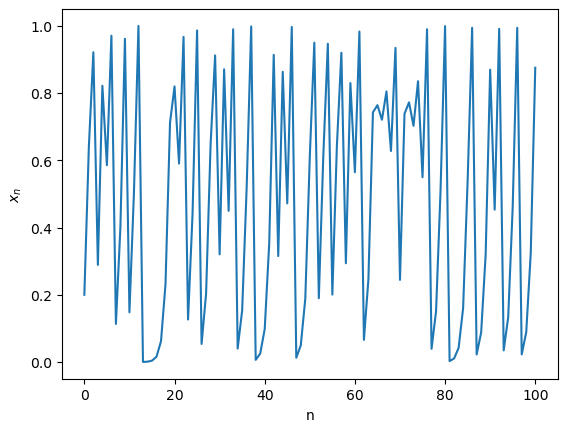

In [14]:
import numpy as np #numerical python
import matplotlib.pyplot as plt
mu , x = 4 , 0.2 #mu is scaled temperature, x is % tank full. setting parameters
xs = [0.2]
for i in range(100):
    x = mu * x *(1-x) # See above the formula
    xs = np.append(xs , x)
    # print(x)
plt.plot(xs) #plotting the xvalues
plt.xlabel("n")
plt.ylabel("$x_n$")
plt.show()
# lables as choas, unpredictable. Sensitive to inital conditions: chaos

On Day 4 we will use AI to predict CHAOS!!!!! 

We can also use AI to predict FINANCIAL STOCK MARKETS!!!!!

# Chemistry

In [18]:
# Program_7a.py: Compute the matrix null-space vector. 
from sympy import Matrix
# Construct the augmented matrix.
ACCM=Matrix([[1,1,0,0,0,1],\
          [1,0,0,2,0,0],\
          [0,3,0,0,1,0],\
          [0,0,1,0,2,0],\
          [0,1,1,0,0,1],\
          [0,0,0,0,0,1]])
print(ACCM)
invACCM=ACCM.inv() # Find the inverse matrix.
print(invACCM)
Nullv=invACCM.col(5) / min(abs(invACCM.col(5))) # Last column.
print(Nullv) # Scaled null-space vector.

Matrix([[1, 1, 0, 0, 0, 1], [1, 0, 0, 2, 0, 0], [0, 3, 0, 0, 1, 0], [0, 0, 1, 0, 2, 0], [0, 1, 1, 0, 0, 1], [0, 0, 0, 0, 0, 1]])
Matrix([[1, 0, -2/7, 1/7, -1/7, -6/7], [0, 0, 2/7, -1/7, 1/7, -1/7], [0, 0, -2/7, 1/7, 6/7, -6/7], [-1/2, 1/2, 1/7, -1/14, 1/14, 3/7], [0, 0, 1/7, 3/7, -3/7, 3/7], [0, 0, 0, 0, 0, 1]])
Matrix([[-6], [-1], [-6], [3], [3], [7]])


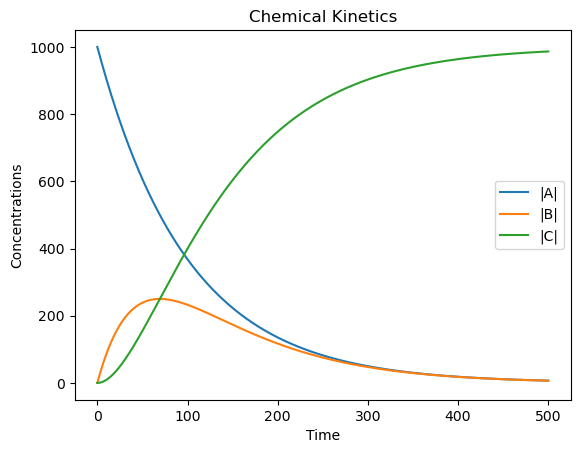

In [20]:
# Program 02h: Chemical kinetics - conservation of mass.# See Exercise 7, the reaction: A -> B -> C.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Set parameters and initial conditions
r1, r2 = 0.01, 0.02
x0, y0, z0 = 1000, 0, 0

# Maximum time point and total number of time points
tmax, n = 500, 10000

def Chemical_Kinetics(X, t, r1, r2):
#The Differential Equations
    x, y, z = X
    dx = -r1 * x
    dy = r1 * x - r2 * y
    dz = r2 * y
    return (dx, dy, dz)

# Integrate differential equations on the time grid t.
t = np.linspace(0, tmax, n)
f = odeint(Chemical_Kinetics, (x0, y0, z0), t, args=(r1, r2))
x, y, z = f.T

plt.figure(1)
plt.xlabel('Time')
plt.ylabel('Concentrations')
plt.title('Chemical Kinetics')
plt.plot(t, x, label='|A|')
plt.plot(t, y, label='|B|')
plt.plot(t, z, label='|C|')
legend = plt.legend(loc='best')
plt.show()

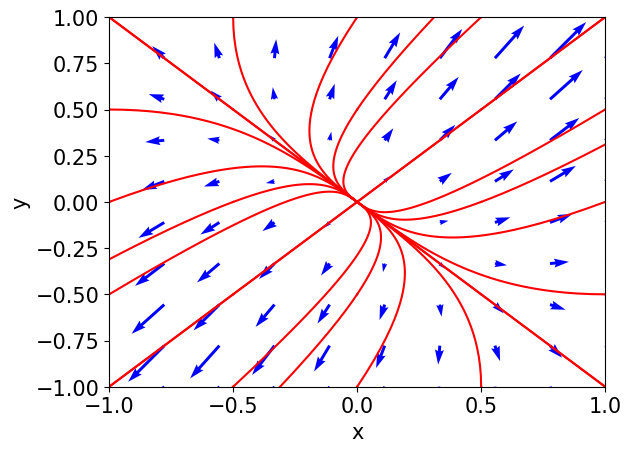

In [21]:
# Program 03a: Phase portrait of a linear system.
# See Figure 3.8(a).

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pylab as pl

# The 2-dimensional linear system.
a, b, c, d = 2, 1, 1, 2
def dx_dt(x, t):
    return [a*x[0] + b *x[1], c*x[0] + d*x[1]]

# Trajectories in forward time.
ts = np.linspace(0, 4, 100)
ic = np.linspace(-1, 1, 5)
for r in ic:
    for s in ic:
        x0 = [r, s]
        xs = odeint(dx_dt, x0, ts)
        plt.plot(xs[:,0], xs[:,1], "r-")

# Trajectories in backward time.       
ts = np.linspace(0, -4, 100)
ic = np.linspace(-1, 1, 5)
for r in ic:
    for s in ic:
        x0 = [r, s]
        xs = odeint(dx_dt, x0, ts)
        plt.plot(xs[:,0], xs[:,1], "r-")

# Label the axes and set fontsizes.    
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(-1,1)
plt.ylim(-1,1)

# Plot the vectorfield. See lines 10, 12 for system.
X,Y = np.mgrid[-1:1:10j,-1:1:10j]
u=a*X + b*Y
v=c*X + d*Y
pl.quiver(X,Y,u,v, color='b')
plt.show()